# Multiple Linear Regression Model 
# For The Prediction Of Demand For Shared Bikes

#### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#### The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands.

#### Business Goal:
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Data Understanding and exploration : Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike sharing dataset

In [1]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import required packages

import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [3]:
#Importing dataset
bike = pd.read_csv('day.csv')

In [4]:
# Checking first few rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Checking feature names in the dataset
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# Let's look at the number of rows and columns in the dataset
bike.shape

#Dataset has 730 rows x 16 columns

(730, 16)

In [7]:
#checking for null values & datatypes of columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike_duplicate = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_duplicate.drop_duplicates(subset=None, inplace=True)

In [9]:
bike_duplicate.shape

(730, 16)

In [10]:
bike.shape

(730, 16)

##### Insights: 
* The shape after running the drop duplicate command is same as the original dataframe.
* Hence we can conclude that there were zero duplicate values in the dataset.

In [11]:
#Checking Statistical features of each column
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observation so far :

* Dataset has 730 rows and 16 columns and there are no null values present
* All other are either float or integer type , except one column,
* One column is of date type.
* Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

## Step 2: Data Preparation and Visualising (EDA)

Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# setting the style for seaborn plots
%matplotlib inline

### Data Cleaning

#### Removing redundant & unwanted columns


* instant - index variable, so it doest make any siginficance for model, so we will consider to drop
* dteday - we year ,month and weekday as separate columns, we can consider to drop
* casual,registered = Both these columns contains the count of bike booked by different categories of customers. 
  Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. 
  More over, we have created a new variable to have the ratio of these customer types.

In [13]:
bike.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#Checking the shape of the dataset
bike.shape

(730, 12)

#### Coverting  4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'  into 'category' data types.

In [15]:
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [16]:
#Checking the datatype again

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


#### Converting Categorical Variables

In [17]:
import calendar

bike.mnth = bike.mnth.apply(lambda x: calendar.month_abbr[x])

In [18]:
## mapping weathersituation
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [19]:
## maping seasons
bike.weekday = bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [20]:
## maping seasons
bike.season = bike.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [21]:
#checking the first few rows
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Plotting the distribution of count, the target variable 

<AxesSubplot:xlabel='cnt', ylabel='Density'>

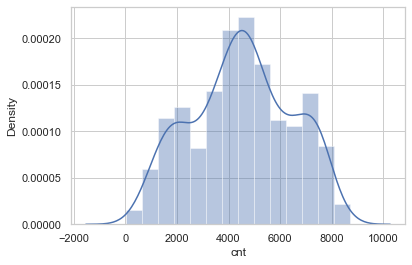

In [22]:
sns.distplot(bike['cnt'])

### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

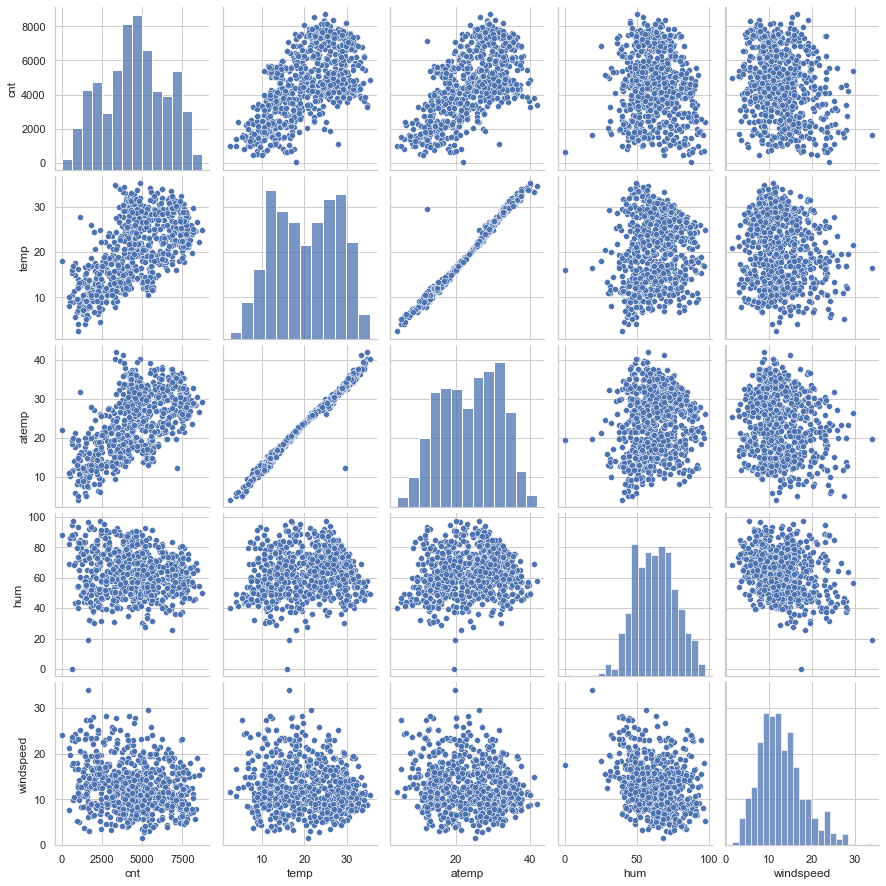

In [23]:
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

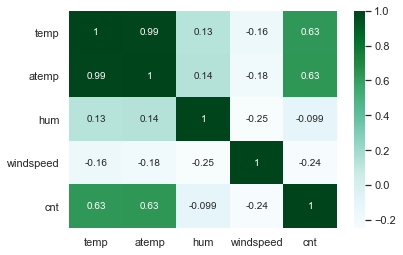

In [24]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

##### Insights
* The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'
* There is multicollinearity between temp and atemp.  We will decide which parameters to keep based on VIF and p-value    w.r.t other variables

### Visualizing Categorical Variables 


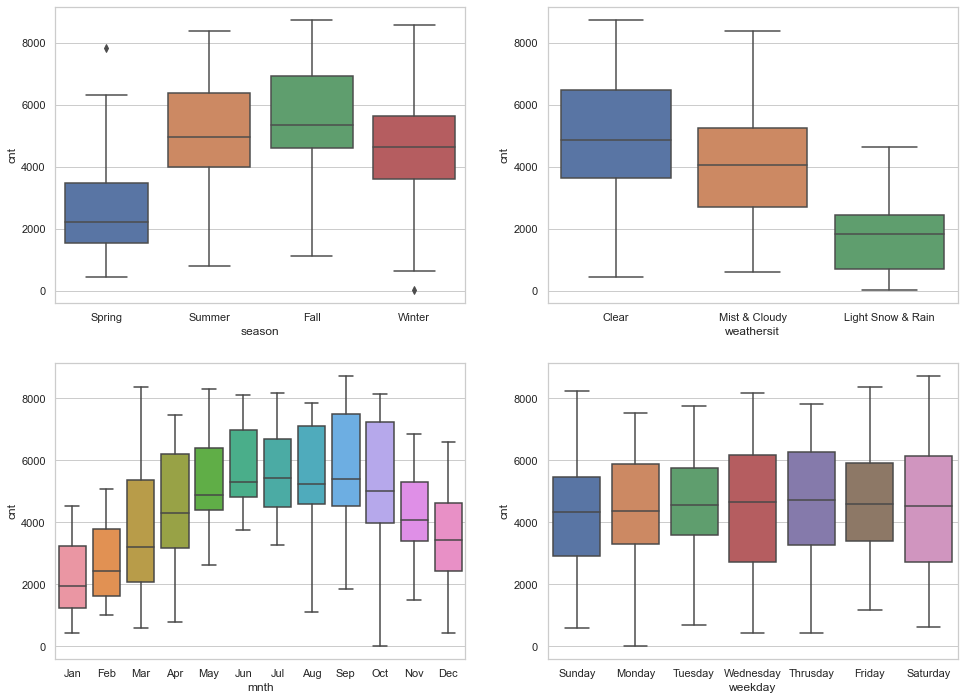

In [25]:
# Seaborn boxplots to get an idea of the distribution/outliers

plt.figure(figsize=(25,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt', data=bike)
plt.subplot(2,3,2)
sns.boxplot(x='weathersit',y='cnt', data=bike)
plt.subplot(2,3,4)
sns.boxplot(x='mnth',y='cnt', data=bike)
plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt', data=bike)
plt.show()


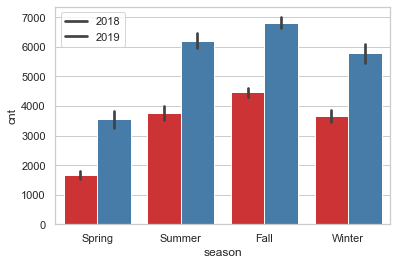

In [26]:
sns.barplot(x='season', y='cnt',data=bike, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

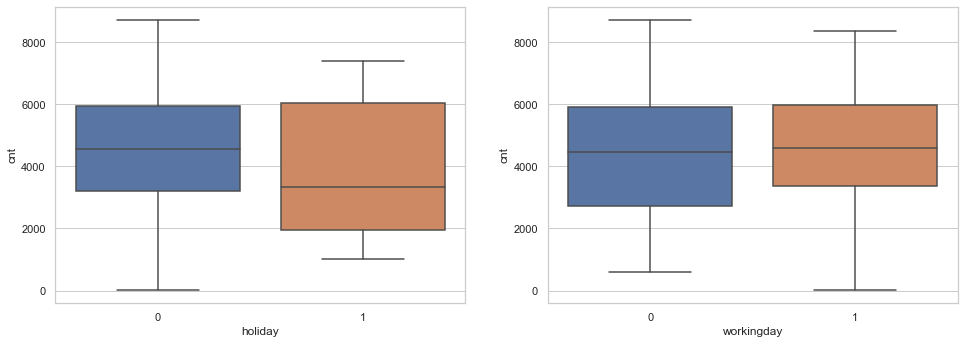

In [27]:
#checking other categorical variables
plt.figure(figsize=(25,12))
plt.subplot(2,3,1)
sns.boxplot(x='holiday',y='cnt', data=bike)
plt.subplot(2,3,2)
sns.boxplot(x='workingday',y='cnt', data=bike)

#### Insights
###### There are 6 categorical variables in dataset
* Weather: When the weather is more clear we can observe there are higher biker rentals 
* Months:  Max. no of bike bookings were happening in the months june, july, aug, sept., oct with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.
* Season: Bike reservations are lesser in Spring season compared to Summer and Fall
* weekday: weekday variable shows very close trend of total booking on all days of the week having   their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. Let's check when we build model whether if this needs to be added or not.
* workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable


### Dummy Variables

In [28]:
#creating dummy variables for season , mnth ,weathersit ,weekday
dummies = bike[['season','mnth','weekday','weathersit']]

In [29]:
dummies = pd.get_dummies(dummies,drop_first=True )

In [30]:
# adding dummy variables to original dataset
bike = pd.concat([dummies,bike],axis = 1)

In [31]:
# Now let's check the dataframe again
bike.head()

,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
#checking columns after adding dummy variables
bike.columns

Index(['season_Summer', 'season_Fall', 'season_Winter', 'mnth_Feb', 'mnth_Mar',
       'mnth_Apr', 'mnth_May', 'mnth_Jun', 'mnth_Jul', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'mnth_Nov', 'mnth_Dec', 'weekday_Monday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thrusday', 'weekday_Friday',
       'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')

#### We have 34 columns in the new dataset , we do not need the variables from which dummy variables were created.
#### So, we can drop those. i.e., 'season','mnth','weekday','weathersit'

In [33]:
## dropping columns for which dummy variables were created
bike.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [34]:
#checking columns 
bike.columns

Index(['season_Summer', 'season_Fall', 'season_Winter', 'mnth_Feb', 'mnth_Mar',
       'mnth_Apr', 'mnth_May', 'mnth_Jun', 'mnth_Jul', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'mnth_Nov', 'mnth_Dec', 'weekday_Monday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thrusday', 'weekday_Friday',
       'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'yr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [35]:
#Checking the shape of the dataframe
bike.shape

(730, 30)

In [36]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Summer                 730 non-null    uint8  
 1   season_Fall                   730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Feb                      730 non-null    uint8  
 4   mnth_Mar                      730 non-null    uint8  
 5   mnth_Apr                      730 non-null    uint8  
 6   mnth_May                      730 non-null    uint8  
 7   mnth_Jun                      730 non-null    uint8  
 8   mnth_Jul                      730 non-null    uint8  
 9   mnth_Aug                      730 non-null    uint8  
 10  mnth_Sep                      730 non-null    uint8  
 11  mnth_Oct                      730 non-null    uint8  
 12  mnth_Nov                      730 non-null    uint8  
 13  mnth_

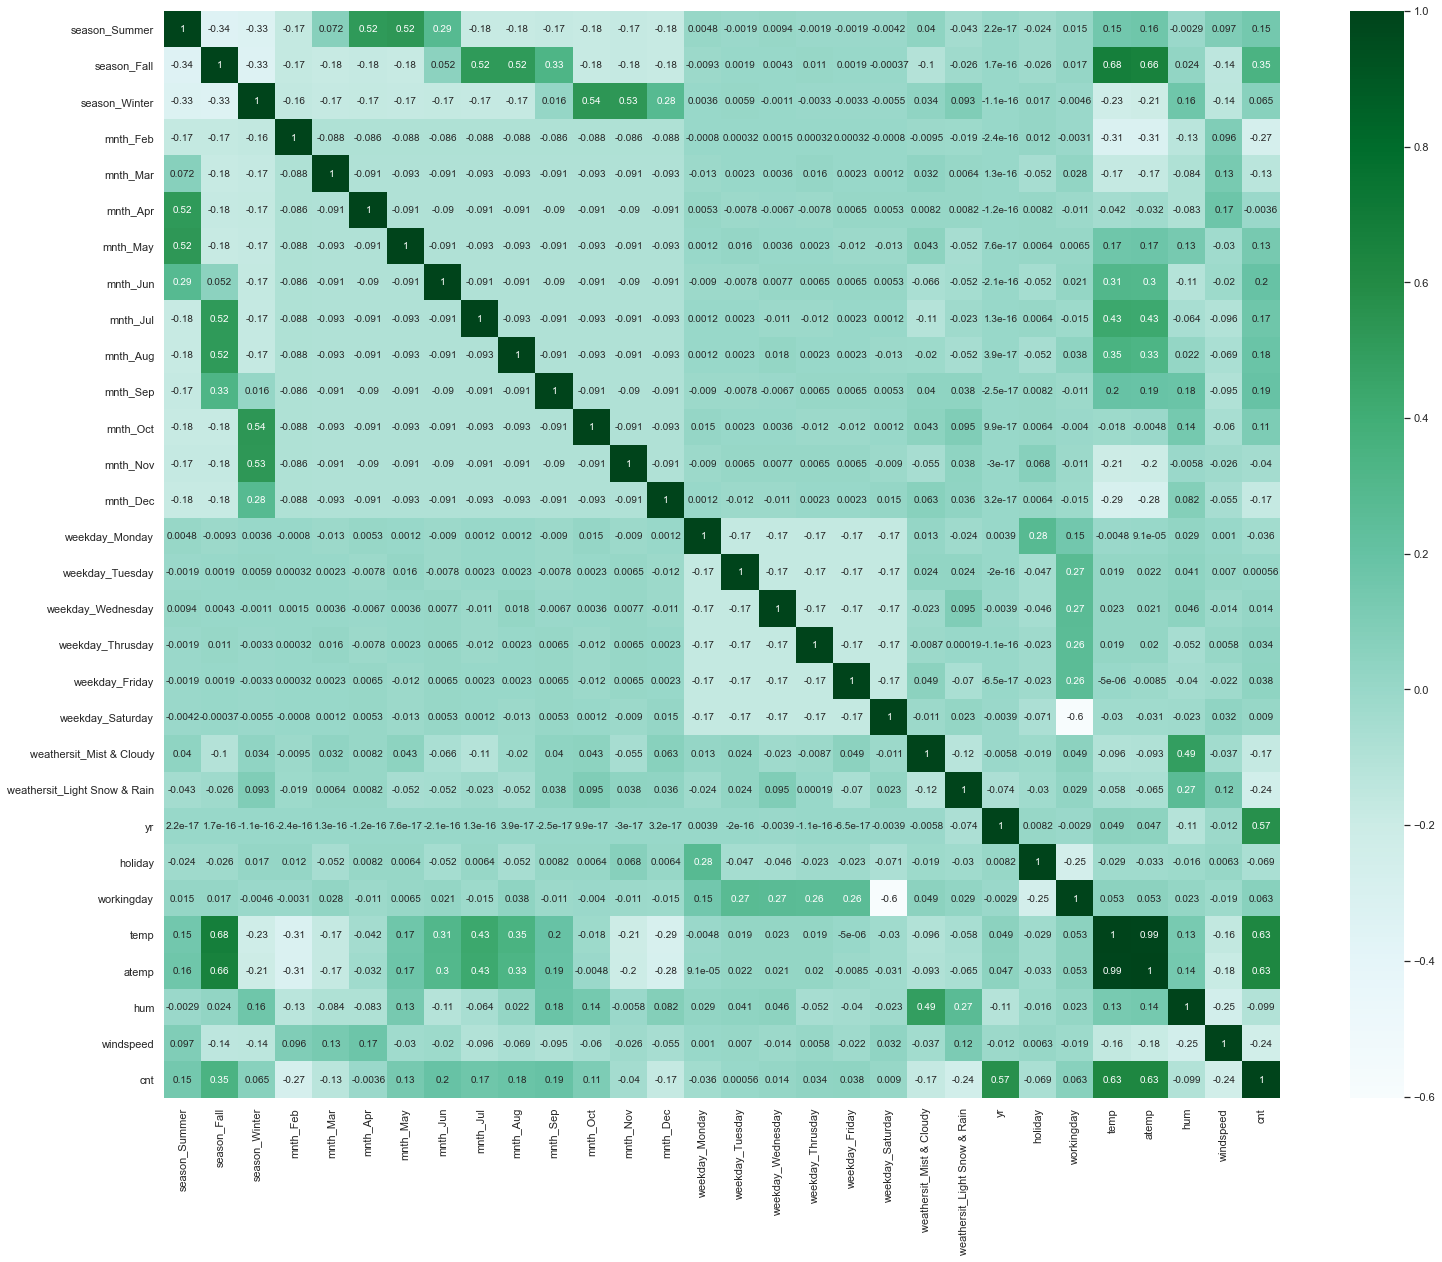

In [37]:
#checking corelation matrix for bike data set
plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap="BuGn")
plt.show()

#### Insights:
* The heatmap clearly shows there are variables which  are multicollinear in nature, and which variable have high collinearity with the target variable.
* We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# Step 3: Splitting the Data into Training and Testing Sets

 #### Performing first basic step for regression : train-test split

In [38]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

# Step 4 : Rescaling the Features

In [39]:
scaler = MinMaxScaler()

In [40]:
# Checking the values before scaling
bike_train.head()

,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,...,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


In [41]:
bike_train.shape

(510, 30)

In [42]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [43]:
bike_train.head()

,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,...,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [44]:
bike_train.describe()

,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,...,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.245098,0.262745,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,...,0.343137,0.029412,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.430568,0.440557,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,...,0.475223,0.169124,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


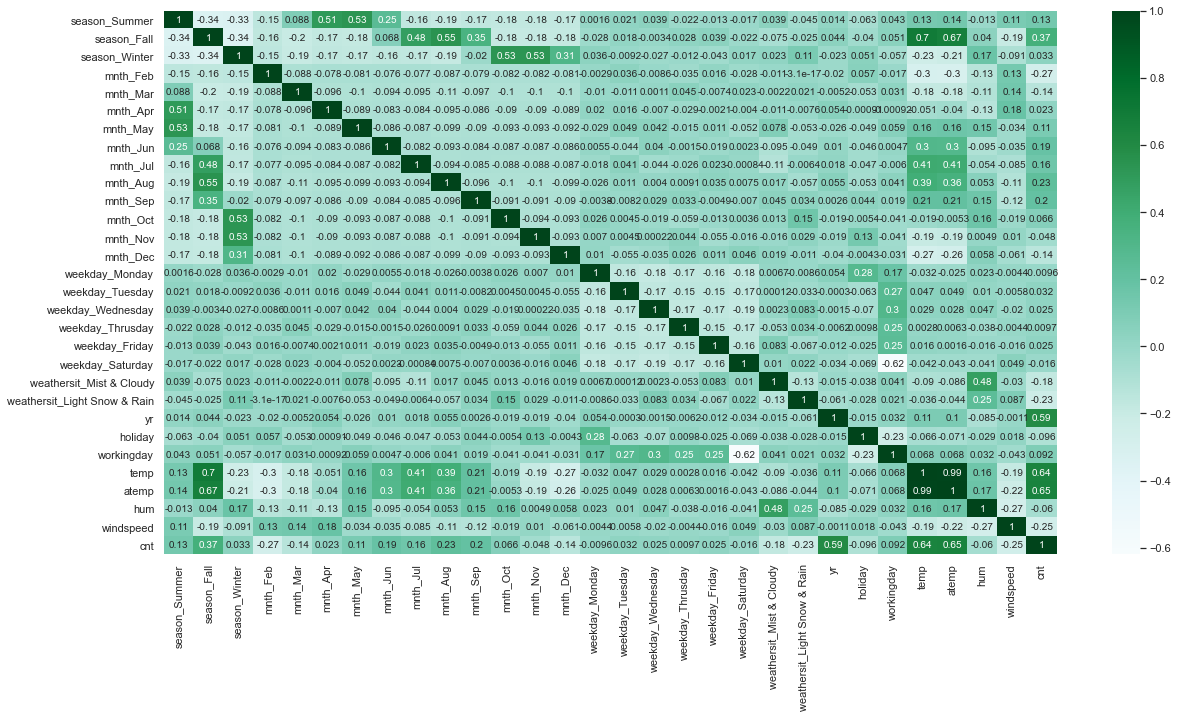

In [45]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="BuGn")
plt.show()

### Insights
cnt seems to have highest correlation with  variable temp.

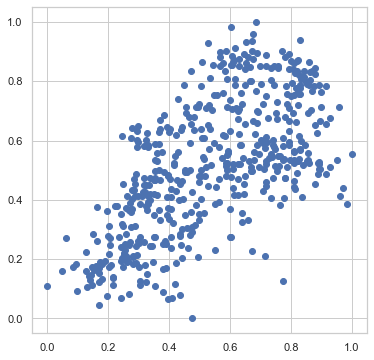

In [46]:
# Visualizing temp  correlation with cnt  to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

### Dividing into X and Y sets for the model building

In [47]:
#Creating X AND Y
y_train = bike_train.pop('cnt')
X_train = bike_train

In [48]:
X_train.head()

,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,...,weekday_Saturday,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,1,0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475


In [49]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# Step 5: Building a linear model

* Fit a regression line through the training data using statsmodels.
* RFE :Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)


In [50]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

#Cut down number of features to 15 using automated approach
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
#Columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Summer', True, 1),
 ('season_Fall', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Feb', False, 7),
 ('mnth_Mar', False, 2),
 ('mnth_Apr', False, 4),
 ('mnth_May', False, 3),
 ('mnth_Jun', False, 5),
 ('mnth_Jul', False, 8),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 9),
 ('mnth_Dec', False, 10),
 ('weekday_Monday', False, 11),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 14),
 ('weekday_Thrusday', False, 15),
 ('weekday_Friday', False, 13),
 ('weekday_Saturday', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['season_Summer', 'season_Fall', 'season_Winter', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['mnth_Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_Jun', 'mnth_Jul',
       'mnth_Nov', 'mnth_Dec', 'weekday_Monday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thrusday', 'weekday_Friday', 'atemp'],
      dtype='object')

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
X_train_rfe.head()

,season_Summer,season_Fall,season_Winter,mnth_Aug,mnth_Sep,mnth_Oct,weekday_Saturday,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,workingday,temp,hum,windspeed
653,0,0,1,0,0,1,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,0,1,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,1,0,1,0,0,0.442393,0.640189,0.255342
728,0,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1,0,0,0,0,0,1,1,0,1,0,0,0.395666,0.504508,0.188475


### Building Linear Model using 'STATS MODEL' , for the detailed statistics

### Model 1: Starting with all variables selected by RFE

In [56]:

# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_rfe).fit()

In [57]:
# Checking the parameters 

lr1.params

const                           0.195004
season_Summer                   0.117478
season_Fall                     0.029493
season_Winter                   0.143048
mnth_Aug                        0.047452
mnth_Sep                        0.117784
mnth_Oct                        0.044229
weekday_Saturday                0.053306
weathersit_Mist & Cloudy       -0.059181
weathersit_Light Snow & Rain   -0.252340
yr                              0.230066
holiday                        -0.054625
workingday                      0.044634
temp                            0.495994
hum                            -0.162256
windspeed                      -0.182417
dtype: float64

In [58]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          1.89e-191
Time:                        16:42:09   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Check for the VIF values of the feature variables. 

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.48
2,season_Fall,6.04
13,temp,3.71
1,season_Summer,2.60
3,season_Winter,2.17
14,hum,1.91
12,workingday,1.88
7,weekday_Saturday,1.79
4,mnth_Aug,1.68
8,weathersit_Mist & Cloudy,1.58


### Insights

####  We generally want a VIF that is less than 5 and P value <0.05. So there are clearly some variables we need to drop.
#### So from above observation season_fall has high VIF and high p value . Let's drop this variable. 

In [60]:

#Dropping season_Fall variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["season_Fall"], axis = 1)

In [61]:
X_train_new.head()

,const,season_Summer,season_Winter,mnth_Aug,mnth_Sep,mnth_Oct,weekday_Saturday,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,1,0,0,1,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,0,0,0,0,0,1,1,0,1,0,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,1,0,0,0,0,1,1,0,1,0,0,0.395666,0.504508,0.188475


In [62]:
X_train_new.columns

Index(['const', 'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

### Model 2 : Rebuilding model without 'season_Fall' Variable

In [63]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_new).fit()

In [64]:
#Let's see the summary of our linear model2
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          3.24e-192
Time:                        16:42:09   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [65]:
X_train_rfe.columns

Index(['const', 'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.47
11,workingday,1.88
13,hum,1.88
6,weekday_Saturday,1.79
2,season_Winter,1.72
12,temp,1.59
7,weathersit_Mist & Cloudy,1.57
5,mnth_Oct,1.49
3,mnth_Aug,1.46
1,season_Summer,1.38


### Insights
#### So from above observation 'holiday' has high P and negatively corelated  . We will drop this variable

In [67]:
#Dropping holiday variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [68]:
X_train_new.columns

Index(['const', 'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'yr', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

### Model 3 : Rebuilding model without 'holiday' variable

In [69]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_new).fit()

In [70]:
#Let's see the summary of our linear model3
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          1.86e-192
Time:                        16:42:10   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -946.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.04
12,hum,1.88
2,season_Winter,1.72
6,weekday_Saturday,1.65
10,workingday,1.65
11,temp,1.59
7,weathersit_Mist & Cloudy,1.57
5,mnth_Oct,1.49
3,mnth_Aug,1.46
1,season_Summer,1.38


In [72]:
#Dropping holiday variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["mnth_Oct"], axis = 1)

In [73]:
X_train_new.columns

Index(['const', 'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep',
       'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'yr', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

### Insights
So from above observation 'mnth_Oct' has high P . We will drop this variable

### Model 4 : Rebuilding model without 'mnth_Oct' variable

In [74]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_new).fit()

In [75]:
#Let's see the summary of our linear model3
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.7
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          2.47e-192
Time:                        16:42:10   Log-Likelihood:                 513.83
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -946.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.45
11,hum,1.87
5,weekday_Saturday,1.65
9,workingday,1.65
6,weathersit_Mist & Cloudy,1.57
10,temp,1.54
3,mnth_Aug,1.44
1,season_Summer,1.37
2,season_Winter,1.32
7,weathersit_Light Snow & Rain,1.24


### Insights
* This model  has VERY LOW Multicollinearity between the predictors  
* P-values for all the predictors seems to be significant. 
* There is multicollinearity displayed in VIF values of weekday_Saturday and workingday. 
* Let's add a variable 'holiday' and check if it changes the model


### Model 5 : Rebuilding model by adding variable 'holiday'

In [77]:
#Adding Holiday to see if model improves
X_train_new['holiday']=X_train['holiday']
X_train_new.head()

,const,season_Summer,season_Winter,mnth_Aug,mnth_Sep,weekday_Saturday,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,workingday,temp,hum,windspeed,holiday
653,1.0,0,1,0,0,0,0,0,1,1,0.509887,0.575354,0.300794,0
576,1.0,0,0,0,0,0,0,0,1,1,0.815169,0.725633,0.264686,0
426,1.0,0,0,0,0,1,1,0,1,0,0.442393,0.640189,0.255342,0
728,1.0,0,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106,0
482,1.0,1,0,0,0,1,1,0,1,0,0.395666,0.504508,0.188475,0


In [78]:
X_train_new.columns

Index(['const', 'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep',
       'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'yr', 'workingday', 'temp', 'hum',
       'windspeed', 'holiday'],
      dtype='object')

In [79]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create fitted model
lr5 = sm.OLS(y_train, X_train_new).fit()

In [80]:
#Let's see the summary of our linear model5
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          3.81e-192
Time:                        16:42:11   Log-Likelihood:                 516.20
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -945.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.94
9,workingday,1.88
11,hum,1.87
5,weekday_Saturday,1.78
6,weathersit_Mist & Cloudy,1.57
10,temp,1.54
3,mnth_Aug,1.44
1,season_Summer,1.37
2,season_Winter,1.32
7,weathersit_Light Snow & Rain,1.24


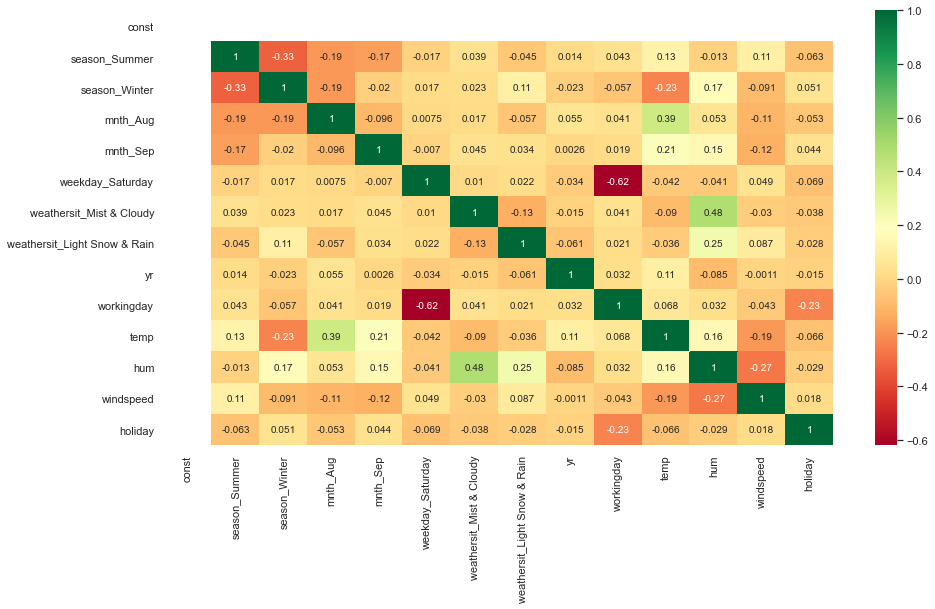

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

### Inference

* Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only
* R2 is 0.846 
* So we go ahead and make our predictions using this model only as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
* Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [83]:
y_train_count = lr5.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

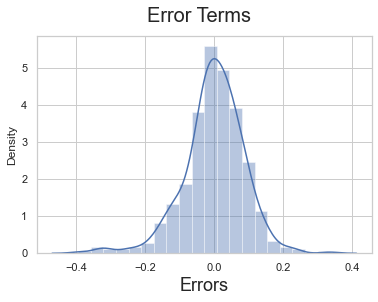

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### Homoscedasticity

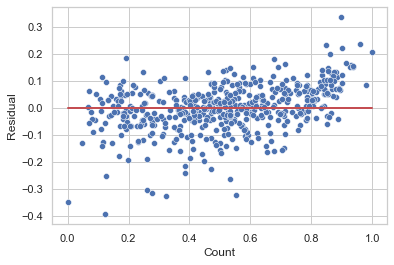

In [85]:

residual = y_train - y_train_count
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

##### No visible pattern observed from above plot for residuals.

## Final Model Interpretation

### Hypothesis Testing:
Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

#### lr5 model coefficient values
const                            0.1877      
season_Summer                    0.1020      
season_Winter                    0.1486      
mnth_Aug                         0.0523      
mnth_Sep                         0.1194      
weekday_Saturday                 0.0520      
weathersit_Mist & Cloudy        -0.0579     
weathersit_Light Snow & Rain    -0.2431     
yr                               0.2289      
workingday                       0.0433      
temp                             0.5394      
hum                             -0.1647      
windspeed                       -0.1822      
holiday                         -0.0581 



### From the lr5 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS


##### F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic:                     210.2
Prob (F-statistic):          3.81e-192

The F-Statistics value of 210.2 (which is greater than 1) and the p-value is alomost 0 
states that the overall model is significant


#### The equation of best fitted surface based on model lr5:
cnt = 0.1877 + (season_Summer x 0.1020 ) + (season_Winter x 0.1486 ) + (mnth_Aug x 0.0523 ) + (mnth_Sep x 0.1194 ) + (weekday_Saturday x 0.0520 ) - (weathersit_Mist & Cloudy x 0.0579  ) - (weathersit_Light Snow & Rain x 0.2431 ) + 
(yr x 0.2289 ) + (workingday x 0.0433 ) + (temp x 0.5394) - (hum x 0.1647) - (windspeed x 0.1822) - (holiday x 0.0581)   



#### const: The Constant value of ‘ 0.1877'   indicates that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by  0.1877 units

# Step 7 : Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 5th model.

In [86]:

# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [87]:
bike_test.describe()

,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,...,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.264840,0.246575,0.232877,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,...,0.319635,0.027397,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.442259,0.432005,0.423633,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,...,0.467403,0.163612,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [88]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [89]:
# Now let's use our model to make predictions.
X_train_rfe = X_train_rfe.drop('const', axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [90]:
X_train_rfe.columns

Index(['season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep',
       'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'yr', 'workingday', 'temp', 'hum',
       'windspeed', 'holiday'],
      dtype='object')

In [91]:
X_test.columns

Index(['season_Summer', 'season_Fall', 'season_Winter', 'mnth_Feb', 'mnth_Mar',
       'mnth_Apr', 'mnth_May', 'mnth_Jun', 'mnth_Jul', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'mnth_Nov', 'mnth_Dec', 'weekday_Monday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thrusday', 'weekday_Friday',
       'weekday_Saturday', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'yr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed'],
      dtype='object')

In [92]:

# Making predictions
y_pred = lr5.predict(X_test_new)

# Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

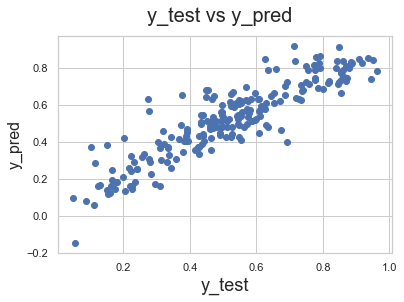

In [93]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

### Insights
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

## Calculating R^2 Value for TEST

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8077018546516641

## Calculating Mean Squared Error

In [95]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009133355819119865

##### Tested model has good fit

In [96]:
X_test_new.shape

(219, 14)

### Calculating Adjusted R^2 Value for TEST

In [97]:
#Cal
r2 = 0.8077018546516641

# n is number of rows in X

n = X_test_new.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7945049231081509

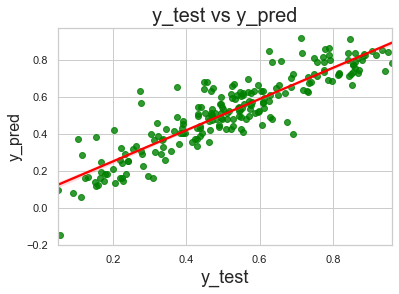

In [98]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [99]:
#Checking the coefficients from the final model
param = pd.DataFrame(lr5.params)
param

,0
const,0.187657
season_Summer,0.101995
season_Winter,0.148613
mnth_Aug,0.052332
mnth_Sep,0.119376
weekday_Saturday,0.052003
weathersit_Mist & Cloudy,-0.057896
weathersit_Light Snow & Rain,-0.243111
yr,0.228914
workingday,0.043346


## Comparision between Training and Testing dataset:


- Train dataset R^2          : 0.846
- Test dataset R^2           : 0.8077
- Train dataset Adjusted R^2 : 0.842  
- Test dataset Adjusted R^2  : 0.7945

## The equation of best fitted surface based on model :

cnt = 0.1877 + (season_Summer x 0.101995 ) + (season_Winter x 0.148613 ) + (mnth_Aug x 0.0523 ) + (mnth_Sep x 0.119376 ) + (weekday_Saturday x 0.052003 ) - (weathersit_Mist & Cloudy x 0.057896 ) - (weathersit_Light Snow & Rain x 0.243111 ) + (yr x 0.228914 ) + (workingday x 0.043346 ) + (temp x 0.539399) - (hum x 0.1647) - (windspeed x 0.164739) - (holiday x 0.058111)

In [100]:
np.mean(X_test_new['temp'])

## norm temp in Celsius -8 to +39

0.5589408723613805

# FINAL INTERPRETATIONS

## Analysing the model the company should take the following steps into consideration 

* Temperature (temp) is having the highest co-efficent . It plays a major role in bookings. A a unit increase in temp  variable increases the bike hire numbers by 0.5393 units when the temperature in normal range
* Company should focus on expanding business during August and September months 
* Saturday , the rentals shows high bookings. 
* When there is high windspeed and misty-cloudy and rainy weathers bike rentals might go low.
* Holiday season is also one such fator wherein rentals might be low.

## Variables significant in predicting the demand for shared bikes are :
* Seasons:   Summer and Winter 	
* Months : August and September	
* Weekday: Saturday
* Year : 2019
* Working Day
* temp	

##### All the  above variables ( season_Summer, season_Winter, mnth_Aug, mnth_Sep, weekday_Saturday, yr, workingday,temp)	have positive coefficients  indicate that an increase in these values will lead to an increase in the bike rentals


## Variables which are responsible for decrease the no of bookings are :
* Weather : Mist & Cloudy , Light Snow & Rain
* hum: humidity
* windspeed: wind speed
* holiday

##### All the  above variables ( weathersit_Mist & Cloudy , weathersit_Light Snow & Rain, hum, windspeed, holiday)	have negative  coefficients  indicate that an decrease  in these values will lead to an decrease in the bike rentals